----------------------------------------------
#Project 1 Data mining
sdi2000048, sdi2000213
----------------------------------------------

In [186]:
#imports
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [187]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

 Some tests to understand our database better

In [188]:
path_listings = '/content/gdrive/MyDrive/data/2019/april/listings.csv'
april_listings = pd.read_csv(path_listings, low_memory=False)
#april_listings.shape[0]
#len(april_listings['name'].unique())


path_listings0 = '/content/gdrive/MyDrive/data/2019/april/listings0.csv'
april_listings0 = pd.read_csv(path_listings0, low_memory=False)
#april_listings0.shape[0]
#april_listings0['name'].shape[0]
#len(april_listings0['name'].unique())
set1 = set(april_listings0['id'].unique())
set2 = set(april_listings['id'].unique())

if set1 == set2:
  print("files have the same ids")

april_listings['name'].equals(april_listings0['name'])

files have the same ids


False

In [189]:
path_listings = '/content/gdrive/MyDrive/data/2019/april/listings.csv'
april_listings = pd.read_csv(path_listings, low_memory=False)
april_listings['name'].head()


0    96m2, 3BR, 2BA, Metro, WI-FI etc...
1     75m2, 2-br, metro, wi-fi, cable TV
2      50m2, Metro, WI-FI, cableTV, more
3    Studio, metro, cable tv, wi-fi, etc
4    47m2, close to metro,cable TV,wi-fi
Name: name, dtype: object

In [190]:
path_listings0 = '/content/gdrive/MyDrive/data/2019/april/listings0.csv'
april_listings0 = pd.read_csv(path_listings0, low_memory=False)
april_listings0['name'].head()

0    96m2, 3BR, 2BA, Metro, WI-FI etc...
1     75m2, 2-br, metro, wi-fi, cable TV
2      50m2, Metro, WI-FI, cableTV, more
3    Studio, metro, cable tv, wi-fi, etc
4    47m2, close to metro,cable TV,wi-fi
Name: name, dtype: object

# Create train_2019.csv

CREATING TRAIN_2019.CSV WITH MONTH COLUMN

In [191]:
path_2019_april = '/content/gdrive/MyDrive/data/2019/april/listings.csv'
path_2019_feb = '/content/gdrive/MyDrive/data/2019/febrouary/listings.csv'  # Corrected the file name
path_2019_mar = '/content/gdrive/MyDrive/data/2019/march/listings.csv'
00
# List of file paths
csv_files = [path_2019_april, path_2019_feb, path_2019_mar]

# Initialize an empty DataFrame to store the combined data
combined_data = pd.DataFrame()
selected_columns = [
    'id','zipcode', 'transit', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews',
    'neighbourhood', 'name', 'latitude', 'longitude', 'last_review', 'instant_bookable',
    'host_since', 'host_response_rate', 'host_identity_verified', 'host_has_profile_pic',
    'first_review', 'description', 'city', 'cancellation_policy', 'bed_type', 'bathrooms',
    'accommodates', 'amenities', 'room_type', 'property_type', 'price', 'availability_365',
    'minimum_nights','host_id','host_listings_count',
    'month'  # Add 'month' to the selected columns
]

# Loop through each CSV file
for file, month in zip(csv_files, ['April', 'Febrοuary', 'March']):
    # Read the CSV file into a DataFrame
  df = pd.read_csv(file, low_memory=False)

    # Add a new column 'month' with the corresponding month name
  df['month'] = month

    # Filter the DataFrame to include only selected columns that exist in both DataFrame and selected_columns
  df = df[[col for col in selected_columns if col in df.columns]]

    # Concatenate the DataFrame to the combined_data DataFrame
  combined_data = pd.concat([combined_data, df], ignore_index=True)

# Write the combined data to a new CSV file
combined_data.to_csv('train_2019.csv', index=False)

# Display the combined data

In [192]:
combined_data = pd.read_csv('/content/train_2019.csv')

#Find which columns may contain nan values
print(combined_data.isnull().any())
print("-----------------------------------------------------------------------")
print(combined_data.dtypes)

id                        False
zipcode                    True
transit                    True
bedrooms                   True
beds                       True
review_scores_rating       True
number_of_reviews         False
neighbourhood              True
name                       True
latitude                  False
longitude                 False
last_review                True
instant_bookable          False
host_since                 True
host_response_rate         True
host_identity_verified     True
host_has_profile_pic       True
first_review               True
description                True
city                       True
cancellation_policy       False
bed_type                  False
bathrooms                 False
accommodates              False
amenities                 False
room_type                 False
property_type             False
price                     False
availability_365          False
minimum_nights            False
host_id                   False
host_lis

In [193]:
df = pd.read_csv('/content/train_2019.csv')
first_null_review_row = df[df['last_review'].isnull()].iloc[0]
print(first_null_review_row)

id                                                                    31155
zipcode                                                        close Athens
transit                                                                 NaN
bedrooms                                                                1.0
beds                                                                    1.0
review_scores_rating                                                    NaN
number_of_reviews                                                         0
neighbourhood                                                  Metaxourgeio
name                                                  sleep on sailing boat
latitude                                                           37.97962
longitude                                                          23.71589
last_review                                                             NaN
instant_bookable                                                          f
host_since  

# Create train_2023.csv

In [194]:
path_2023_june = '/content/gdrive/MyDrive/data/2023/june/listings.csv'
path_2023_mar = '/content/gdrive/MyDrive/data/2023/march/listings.csv'
path_2023_sep = '/content/gdrive/MyDrive/data/2023/september/listings.csv'

path_listings0_june = '/content/gdrive/MyDrive/data/2023/june/listings0.csv'
path_listings0_mar = '/content/gdrive/MyDrive/data/2023/march/listings0.csv'
path_listings0_sep = '/content/gdrive/MyDrive/data/2023/september/listings0.csv'

#zipcode, transit, review_scores_rating, number_of_reviews(in listings0),
#instant_bookable, first_review, cancellation_policy, city, bed_type,
#does not exist


# Initialize an empty DataFrame to store the combined data
combined_data = pd.DataFrame()
selected_columns = [
     'id','zipcode', 'transit', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews',
    'neighbourhood','neighbourhood_cleansed', 'name', 'latitude', 'longitude', 'last_review', 'instant_bookable',
    'host_since', 'host_response_rate', 'host_identity_verified', 'host_has_profile_pic',
    'first_review', 'description', 'city', 'cancellation_policy', 'bed_type', 'bathrooms',
    'accommodates', 'amenities', 'room_type', 'property_type', 'price', 'availability_365',
    'minimum_nights','host_id','calculated_host_listings_count','month'
]


csv_files = [path_2023_june,path_2023_mar,path_2023_sep]
listing0_csv_files = [path_listings0_june,path_listings0_mar,path_listings0_sep]

for file, month in zip(csv_files, ['June','March','September']):
  # Read the CSV file into a DataFrame
  df = pd.read_csv(file)
  df['month'] = month
  # Concatenate the DataFrame to the combined_data DataFrame
  combined_data = pd.concat([combined_data, df], ignore_index=True)
  combined_data = combined_data[[col for col in selected_columns if col in df.columns]]




# Write the combined data to a new CSV file
combined_data.to_csv('train_2023.csv', index=False)

# Display the combined data
#print(combined_data)

In [195]:
combined_data = pd.read_csv('/content/train_2023.csv')

#Find which columns may contain nan values
print(combined_data.isnull().any())
print("-----------------------------------------------------------------------")
print(combined_data.dtypes)

id                                False
bedrooms                           True
beds                               True
review_scores_rating               True
number_of_reviews                 False
neighbourhood                      True
neighbourhood_cleansed            False
name                               True
latitude                          False
longitude                         False
last_review                        True
instant_bookable                  False
host_since                         True
host_response_rate                 True
host_identity_verified             True
host_has_profile_pic               True
first_review                       True
description                        True
bathrooms                          True
accommodates                      False
amenities                         False
room_type                         False
property_type                     False
price                             False
availability_365                  False


#Cleaning train_2019.csv data


In [196]:
#Funtions to replace null values in entries that have zero reviews with the mean
#We do this in order not to discard rows because of null values in the review column

def mean_of_non_null_reviews(column, df):
  non_null = df[column].notnull()
  df[column] = df[column].astype(str)
  year_sum = 0
  month_sum = 0
  day_sum = 0
  count = 0
  for index, row in df[non_null].iterrows():
    date = row[column]
    if date != 'nan':  # Check for NaN value
      date = date.split('-')
      year_sum += int(date[0])
      month_sum += int(date[1])
      day_sum += int(date[2])
      count += 1
  if count == 0:
        return None  # Return None if all values are NaN
  year_mean = str(int(year_sum / count))
  month_mean = f'{int(month_sum / count):02d}'
  day_mean =  f'{int(day_sum / count):02d}'
  return year_mean+'-'+month_mean+'-'+day_mean


def replace_null_reviews(df):
    #Find null last_review, first_review and replace with mean
    df['last_review'] = df['last_review'].astype(str)
    df['first_review'] = df['first_review'].astype(str)
    mean_last= mean_of_non_null_reviews('last_review',df)
    mean_first = mean_of_non_null_reviews('first_review',df)
    #Review scores rating mean value
    mean_value = df['review_scores_rating'][df['review_scores_rating'].notnull()].mean()
    df['review_scores_rating'].fillna(mean_value, inplace=True)
    # Replace null values in 'last_review' column
    df['last_review'].fillna(mean_last)
    # Replace null values in 'first_review' column
    df['first_review'].fillna(mean_first)


#Find null review score rating and replace with mean
# Replace null values with the mean
#data = read_csv('/content/train_2019.csv')
#print(data['last_review'].isnull().any())
#print(data['first_review'].isnull().any())
#print(data['review_scores_rating'].isnull().any())


In [197]:
combined_data = pd.read_csv('/content/train_2019.csv')

#Drop rows with nan values
#new_data= combined_data.dropna()
combined_data = combined_data.drop_duplicates(subset='id')
replace_null_reviews(combined_data)
combined_data = combined_data.dropna()

#new_data.to_csv('modified_data_2019.csv', index=False)

data = combined_data
#data = pd.DataFrame()
#data = pd.read_csv('modified_data_2019.csv',low_memory=False)

columns_to_convert = ['price', 'host_response_rate']  # Add more columns if needed

# Remove '$' symbol and convert to integer
for col in columns_to_convert:
  data[col] = data[col].str.replace('[^\d.]', '', regex=True).astype(float).astype(int)

#Find numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
index_position = numeric_columns.get_loc('id')  # Remove id from index, we dont want to modify it
numeric_columns = numeric_columns.delete(index_position)
# Print the names of numeric columns
print("Numeric Columns:")
#print(numeric_columns)

#Calculate the avarage of each column
numeric_mean = data[numeric_columns].mean()
print(numeric_mean)

# Find values that deviate from the average in each numeric column
#deviations_from_mean = data[numeric_columns].subtract(numeric_mean)

#Calculate the max of each column
max_values = data[numeric_columns].max()

# Print the maximum value for each numeric column
print("\nThe max value of each column without any modification")
print("Maximum Values:")
print(max_values)

for col in numeric_columns:
    mask = data[col] > 2 * numeric_mean[col]  # Create a boolean mask for values exceeding double the mean
    data = data[~mask]
print("\nThe maximum values of each colunm after discarding great values")
max_values = data[numeric_columns].max()
print(max_values)

#data.to_csv('new_data_2019.csv', index=False)
data.to_csv('train_2019.csv', index=False)


<ipython-input-197-10bf5098e1b5>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].str.replace('[^\d.]', '', regex=True).astype(float).astype(int)
<ipython-input-197-10bf5098e1b5>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].str.replace('[^\d.]', '', regex=True).astype(float).astype(int)


Numeric Columns:
bedrooms                1.427078e+00
beds                    2.237266e+00
review_scores_rating    9.573906e+01
number_of_reviews       3.900232e+01
latitude                3.797951e+01
longitude               2.373162e+01
host_response_rate      9.713240e+01
bathrooms               1.198772e+00
accommodates            4.087440e+00
price                   5.728439e+01
availability_365        2.373994e+02
minimum_nights          3.171064e+00
host_id                 9.612129e+07
host_listings_count     1.558221e+01
dtype: float64

The max value of each column without any modification
Maximum Values:
bedrooms                1.400000e+01
beds                    2.300000e+01
review_scores_rating    1.000000e+02
number_of_reviews       6.260000e+02
latitude                3.803136e+01
longitude               2.378007e+01
host_response_rate      1.000000e+02
bathrooms               1.000000e+01
accommodates            1.600000e+01
price                   1.000000e+03
availabil

# Cleaning train_2023.csv data

In [198]:
combined_data = pd.read_csv('/content/train_2023.csv')

#Drop rows with nan values
#new_data= combined_data.dropna()
combined_data = combined_data.drop_duplicates(subset='id')
replace_null_reviews(combined_data)
combined_data = combined_data.drop('bathrooms', axis=1) #Bathrooms is nan in 2023 data
combined_data = combined_data.dropna()

#new_data.to_csv('modified_data_2019.csv', index=False)

data = combined_data
#data = pd.DataFrame()
#data = pd.read_csv('modified_data_2019.csv',low_memory=False)

columns_to_convert = ['price', 'host_response_rate']  # Add more columns if needed

# Remove '$' symbol and convert to integer
for col in columns_to_convert:
  data[col] = data[col].str.replace('[^\d.]', '', regex=True).astype(float).astype(int)

#Find numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
index_position = numeric_columns.get_loc('id')  # Remove id from index, we dont want to modify it
numeric_columns = numeric_columns.delete(index_position)
# Print the names of numeric columns
print("Numeric Columns:")
#print(numeric_columns)

#Calculate the avarage of each column
numeric_mean = data[numeric_columns].mean()
print(numeric_mean)

# Find values that deviate from the average in each numeric column
#deviations_from_mean = data[numeric_columns].subtract(numeric_mean)

#Calculate the max of each column
max_values = data[numeric_columns].max()

# Print the maximum value for each numeric column
print("\nThe max value of each column without any modification")
print("Maximum Values:")
print(max_values)

for col in numeric_columns:
    mask = data[col] > 2 * numeric_mean[col]  # Create a boolean mask for values exceeding double the mean
    data = data[~mask]
print("\nThe maximum values of each colunm after discarding great values")
max_values = data[numeric_columns].max()
print(max_values)

#data.to_csv('new_data_2019.csv', index=False)
data.to_csv('train_2023.csv', index=False)

Numeric Columns:
bedrooms                          1.526176e+00
beds                              2.176279e+00
review_scores_rating              4.762714e+00
number_of_reviews                 5.856196e+01
latitude                          3.797872e+01
longitude                         2.373126e+01
host_response_rate                9.740166e+01
accommodates                      3.951050e+00
price                             1.097274e+02
availability_365                  2.233854e+02
minimum_nights                    2.698610e+00
host_id                           1.870733e+08
calculated_host_listings_count    1.315424e+01
dtype: float64

The max value of each column without any modification
Maximum Values:
bedrooms                          1.400000e+01
beds                              3.000000e+01
review_scores_rating              5.000000e+00
number_of_reviews                 8.310000e+02
latitude                          3.803035e+01
longitude                         2.378022e+01
host

# 1.1

In [199]:
 #  the most frequent value(s) in the column
data = pd.read_csv('/content/train_2019.csv')
most_frequent_values = data['room_type'].value_counts().idxmax()
# For multiple most frequent values:
# most_frequent_values = df['column_name'].value_counts().idxmax()

print("Most frequent value(s):", most_frequent_values)


Most frequent value(s): Entire home/apt


In [200]:
 #  the most frequent value(s) in the column
data = pd.read_csv('/content/train_2023.csv')
most_frequent_values = data['room_type'].value_counts().idxmax()
# For multiple most frequent values:
# most_frequent_values = df['column_name'].value_counts().idxmax()

print("Most frequent value(s):", most_frequent_values)


Most frequent value(s): Entire home/apt


# 1.2

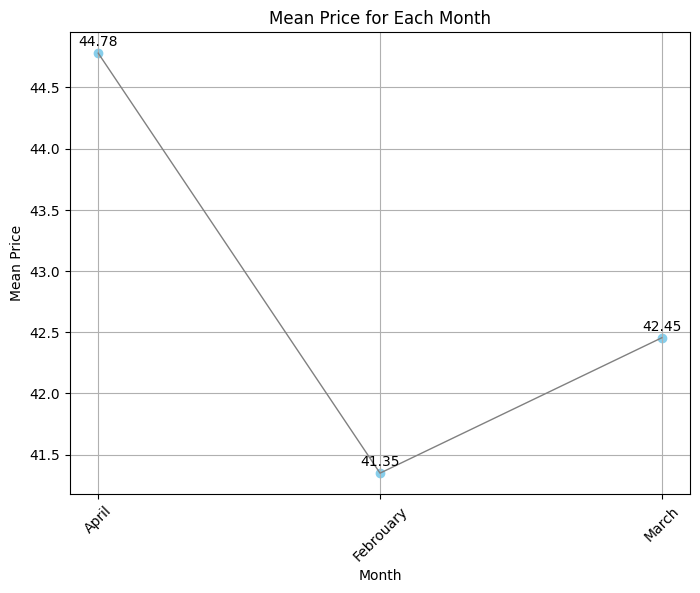

In [201]:
#1.2
data = pd.read_csv('/content/train_2019.csv')
data['month'] = pd.Categorical(data['month'], categories=['April','Febrοuary','March'], ordered=True)

# Calculate the mean price for each month
mean_prices = data.groupby('month')['price'].mean().reset_index()

# Plot the mean prices for each month as points
plt.figure(figsize=(8, 6))
plt.scatter(mean_prices['month'], mean_prices['price'], color='skyblue', marker='o')

# Annotate each point with its corresponding mean value
for i, mean_price in enumerate(mean_prices['price']):
    plt.annotate(f'{mean_price:.2f}', (mean_prices['month'][i], mean_price), textcoords="offset points", xytext=(0,5), ha='center')

# Connect the points with lines
plt.plot(mean_prices['month'], mean_prices['price'], color='gray', linestyle='-', linewidth=1)

plt.title('Mean Price for Each Month')
plt.xlabel('Month')
plt.ylabel('Mean Price')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

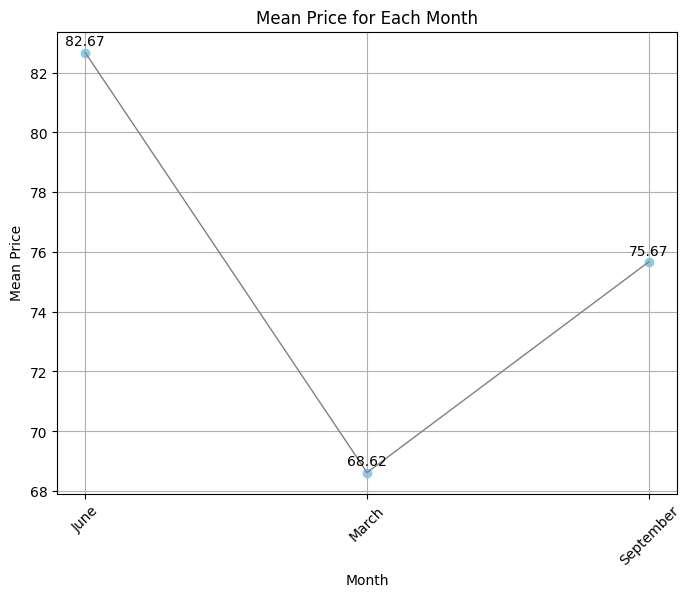

In [202]:
data = pd.read_csv('/content/train_2023.csv')
data['month'] = pd.Categorical(data['month'], categories=['June', 'March', 'September'], ordered=True)

# Calculate the mean price for each month
mean_prices = data.groupby('month')['price'].mean().reset_index()

# Plot the mean prices for each month as points
plt.figure(figsize=(8, 6))
plt.scatter(mean_prices['month'], mean_prices['price'], color='skyblue', marker='o')

# Annotate each point with its corresponding mean value
for i, mean_price in enumerate(mean_prices['price']):
    plt.annotate(f'{mean_price:.2f}', (mean_prices['month'][i], mean_price), textcoords="offset points", xytext=(0,5), ha='center')

# Connect the points with lines
plt.plot(mean_prices['month'], mean_prices['price'], color='gray', linestyle='-', linewidth=1)

plt.title('Mean Price for Each Month')
plt.xlabel('Month')
plt.ylabel('Mean Price')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

#1.3

In [203]:
#1.3
#print(data.columns)
data= pd.read_csv('/content/train_2019.csv')
reviews_by_neighborhood = data.groupby('neighbourhood')['number_of_reviews'].sum().reset_index()

# Sort neighborhoods based on total reviews in descending order
reviews_by_neighborhood = reviews_by_neighborhood.sort_values(by='number_of_reviews', ascending=False)


# Select the top five neighborhoods with the most reviews
top_five_neighborhoods = reviews_by_neighborhood.head(5)

print(top_five_neighborhoods)

   neighbourhood  number_of_reviews
24         Plaka               6366
12       Koukaki               5545
19   Neos Kosmos               5427
14      Larissis               4022
3     Ambelokipi               4005


In [204]:
#1.3
#print(data.columns)
data= pd.read_csv('/content/train_2023.csv')
reviews_by_neighborhood = data.groupby('neighbourhood_cleansed')['number_of_reviews'].sum().reset_index()

# Sort neighborhoods based on total reviews in descending order
reviews_by_neighborhood = reviews_by_neighborhood.sort_values(by='number_of_reviews', ascending=False)


# Select the top five neighborhoods with the most reviews
top_five_neighborhoods = reviews_by_neighborhood.head(5)

print(top_five_neighborhoods)

              neighbourhood_cleansed  number_of_reviews
15            ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              16327
23               ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ               9761
28                       ΝΕΟΣ ΚΟΣΜΟΣ               7128
26          ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ               6882
2   ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ               4560


# 1.4

In [205]:
data= pd.read_csv('/content/train_2019.csv')
neighborhood_counts = data['neighbourhood'].value_counts()
print(neighborhood_counts.head(1))

neighbourhood
Plaka    257
Name: count, dtype: int64


In [206]:
data= pd.read_csv('/content/train_2023.csv')
neighborhood_counts = data['neighbourhood_cleansed'].value_counts()
print(neighborhood_counts.head(1))

neighbourhood_cleansed
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ    584
Name: count, dtype: int64


#1.5

In [207]:
#1.5
data= pd.read_csv('/content/train_2019.csv')
inserts_by_month_neighborhood = data.groupby(['month', 'neighbourhood']).size().reset_index(name='inserts')

print(inserts_by_month_neighborhood)

    month      neighbourhood  inserts
0   April       Agios Loukas       17
1   April     Agios Nikolaos       63
2   April  Akadimia Platonos       14
3   April         Ambelokipi      183
4   April             Attiki       92
..    ...                ...      ...
61  March           Larissis        1
62  March        Neos Kosmos        1
63  March           Pangrati        2
64  March       Pedion Areos        1
65  March          Petralona        1

[66 rows x 3 columns]


In [208]:
#1.5
data= pd.read_csv('/content/train_2023.csv')
inserts_by_month_neighborhood = data.groupby(['month', 'neighbourhood_cleansed']).size().reset_index(name='inserts')

print(inserts_by_month_neighborhood)

         month            neighbourhood_cleansed  inserts
0         June                    1Ο ΝΕΚΡΟΤΑΦΕΙΟ       10
1         June                  ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ        7
2         June  ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ      132
3         June                    ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ       18
4         June                 ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ       14
..         ...                               ...      ...
97   September                       ΠΕΔΙΟ ΑΡΕΩΣ        1
98   September                         ΠΕΤΡΑΛΩΝΑ        5
99   September                  ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ        5
100  September                   ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ        2
101  September                            ΣΤΑΔΙΟ        5

[102 rows x 3 columns]


# 1.6

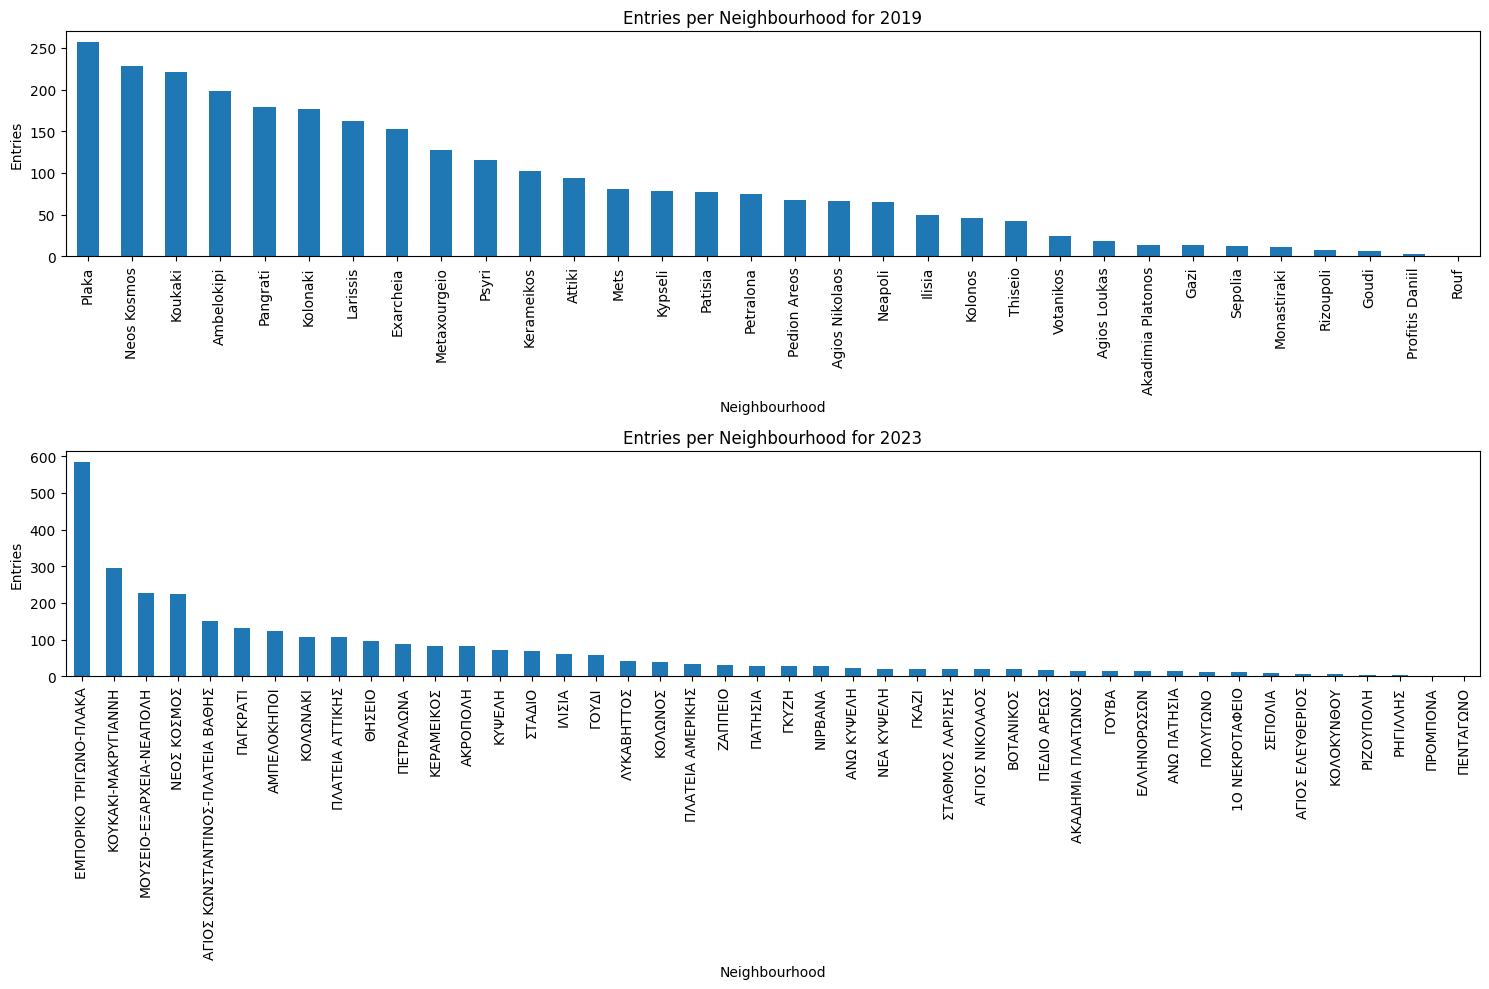

In [209]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#Entries per neighbourhood 2019
data = pd.read_csv('/content/train_2019.csv')
counts1 = data['neighbourhood'].value_counts()
# Plot the histogram
#Entries per neighbourhood 2023
data = pd.read_csv('/content/train_2023.csv')
counts2 = data['neighbourhood_cleansed'].value_counts()

# Create a figure with two subplots arranged horizontally
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

# Plot value counts of 'Categor' column from df1
counts1.plot(kind='bar', ax=axs[0])
axs[0].set_xlabel('Neighbourhood')
axs[0].set_ylabel('Entries')
axs[0].set_title('Entries per Neighbourhood for 2019')

# Plot value counts of 'Category' column from df2
counts2.plot(kind='bar', ax=axs[1])
axs[1].set_xlabel('Neighbourhood')
axs[1].set_ylabel('Entries')
axs[1].set_title('Entries per Neighbourhood for 2023')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

# 1.7

Most Common room_type for each neighborhood for 2019

In [210]:
data = pd.read_csv('/content/train_2019.csv')
counts = data.groupby('neighbourhood')['room_type'].value_counts()
most_common = counts.groupby(level=0).nlargest(1).reset_index(level=0, drop=True)
print(most_common)

neighbourhood      room_type      
Agios Loukas       Entire home/apt     15
Agios Nikolaos     Entire home/apt     59
Akadimia Platonos  Entire home/apt     12
Ambelokipi         Entire home/apt    181
Attiki             Entire home/apt     78
Exarcheia          Entire home/apt    132
Gazi               Entire home/apt      9
Goudi              Entire home/apt      7
Ilisia             Entire home/apt     46
Kerameikos         Entire home/apt     98
Kolonaki           Entire home/apt    166
Kolonos            Entire home/apt     38
Koukaki            Entire home/apt    203
Kypseli            Entire home/apt     69
Larissis           Entire home/apt    146
Metaxourgeio       Entire home/apt    119
Mets               Entire home/apt     78
Monastiraki        Entire home/apt      7
Neapoli            Entire home/apt     58
Neos Kosmos        Entire home/apt    217
Pangrati           Entire home/apt    167
Patisia            Entire home/apt     71
Pedion Areos       Entire home/apt     60

Most Common room_type for each neighborhood for 2023

In [211]:
data = pd.read_csv('/content/train_2023.csv')
counts = data.groupby('neighbourhood_cleansed')['room_type'].value_counts()
most_common = counts.groupby(level=0).nlargest(1).reset_index(level=0, drop=True)
print(most_common)

neighbourhood_cleansed            room_type      
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                    Entire home/apt     12
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                  Entire home/apt      7
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ  Entire home/apt    143
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                    Entire home/apt     18
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                 Entire home/apt     15
ΑΚΡΟΠΟΛΗ                          Entire home/apt     80
ΑΜΠΕΛΟΚΗΠΟΙ                       Entire home/apt    121
ΑΝΩ ΚΥΨΕΛΗ                        Entire home/apt     22
ΑΝΩ ΠΑΤΗΣΙΑ                       Entire home/apt     15
ΒΟΤΑΝΙΚΟΣ                         Entire home/apt     19
ΓΚΑΖΙ                             Entire home/apt     21
ΓΚΥΖΗ                             Entire home/apt     27
ΓΟΥΒΑ                             Entire home/apt     15
ΓΟΥΔΙ                             Entire home/apt     57
ΕΛΛΗΝΟΡΩΣΩΝ                       Entire home/apt     15
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ            Entire home/apt    532
ΖΑΠΠΕΙΟ                           Enti

# 1.8

Most expensive room_type for 2019

In [212]:
data = pd.read_csv('/content/train_2019.csv')
most_expensive = data.groupby('room_type')['price'].mean().nlargest(1)
print("The most expensive room_type is:\n", most_expensive)

The most expensive room_type is:
 room_type
Entire home/apt    46.086785
Name: price, dtype: float64


Most expensive room_type for 2023

In [213]:
data = pd.read_csv('/content/train_2023.csv')
most_expensive = data.groupby('room_type')['price'].mean().nlargest(1)
print("The most expensive room_type is:\n", most_expensive)

The most expensive room_type is:
 room_type
Hotel room    125.7
Name: price, dtype: float64


# 1.9

Folium Map for April 2019

In [214]:
import folium
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
data = pd.read_csv('/content/train_2019.csv')
april = pd.read_csv('/content/gdrive/MyDrive/data/2019/april/listings.csv', low_memory=False)
april_ids = april['id']
locations = data[data['id'].isin(april_ids)]
#print(locations.columns)

locations = locations[['latitude', 'longitude', 'name']]
map = folium.Map(locations=[locations.latitude.mean(), locations.longitude.mean()], zoom_start=14, control_scale=True)

for index, location_info in locations.iterrows():
    folium.Marker([location_info['latitude'], location_info['longitude']], popup=location_info['name']).add_to(map)


In [215]:
data = pd.read_csv('/content/train_2019.csv')
filtered_data = data[data['month'] == 'April']
# Initialize the map
m = folium.Map(location=[filtered_data['latitude'].mean(), filtered_data['longitude'].mean()], zoom_start=12)

# Add markers for each property on the map
for index, row in filtered_data.iterrows():
    popup_text = f"Bed Type: {row['bed_type']} <br> Room Type: {row['room_type']}"
    folium.Marker([row['latitude'], row['longitude']], popup=popup_text).add_to(m)

# Display the map
m

Folium Map for February 2023

In [216]:
import folium
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
data = pd.read_csv('/content/train_2023.csv')
june = pd.read_csv('/content/gdrive/MyDrive/data/2023/june/listings.csv', low_memory=False)
june_ids = april['id']
locations = data[data['id'].isin(april_ids)]
#print(locations.columns)

locations = locations[['latitude', 'longitude', 'name']]
map = folium.Map(locations=[locations.latitude.mean(), locations.longitude.mean()], zoom_start=14, control_scale=True)

for index, location_info in locations.iterrows():
    folium.Marker([location_info['latitude'], location_info['longitude']], popup=location_info['name']).add_to(map)


In [217]:
data = pd.read_csv('/content/train_2023.csv')
filtered_data = data[data['month'] == 'September']
# Initialize the map
m = folium.Map(location=[filtered_data['latitude'].mean(), filtered_data['longitude'].mean()], zoom_start=12)

# Add markers for each property on the map
for index, row in filtered_data.iterrows():
    popup_text = f"Name: {row['name']} <br> Room Type: {row['room_type']}"
    folium.Marker([row['latitude'], row['longitude']], popup=popup_text).add_to(m)

# Display the map
m

# 1.10

#Data from 2019

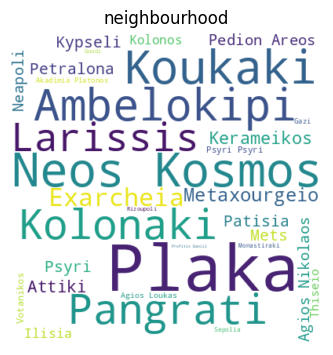

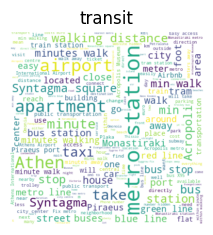

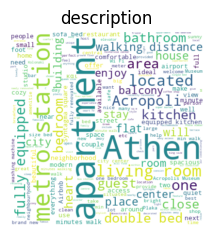

In [218]:
from wordcloud import WordCloud
# Data
data = pd.read_csv('/content/train_2019.csv')
cols = ['neighbourhood','transit', 'description']
wordcloud = [0, 0, 0]
# Create a figure with two subplots arranged horizontally
plt.figure(figsize=(10, 10))
for i,col in enumerate(cols):
  text = data[col].astype(str).str.cat(sep=' ')
  # Create a WordCloud object
  wordcloud[i] = WordCloud(width=400, height=400, background_color='white').generate(text)
  # Plot value counts of 'Categor' column from df1
  plt.subplot(1, 3, (i+1))
  plt.imshow(wordcloud[i], interpolation='bilinear')
  plt.title(col)
  plt.axis('off')
  # Adjust layout to prevent overlapping
  plt.tight_layout()

  # Show the plots
  plt.show()



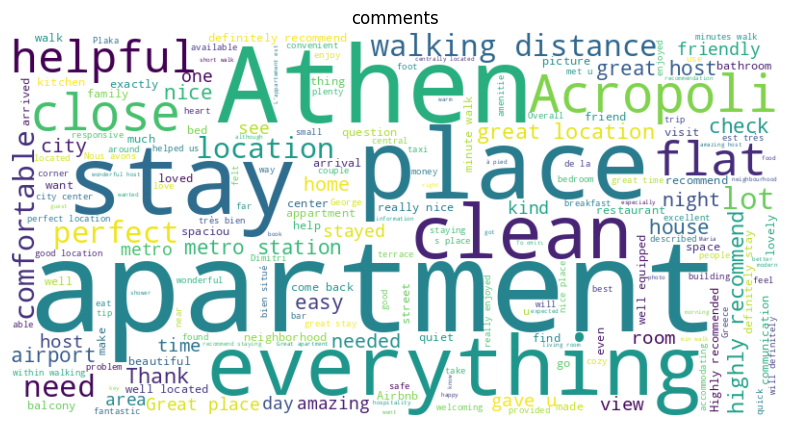

In [219]:
from wordcloud import WordCloud
path_2019_april = '/content/gdrive/MyDrive/data/2019/april/reviews.csv'
path_2019_feb = '/content/gdrive/MyDrive/data/2019/febrouary/reviews.csv'  # Corrected the file name
path_2019_mar = '/content/gdrive/MyDrive/data/2019/march/reviews.csv'
csv_files = [path_2019_april,path_2019_feb,path_2019_mar]

combined_data = pd.DataFrame()
selected_columns = ['comments']

for file in csv_files:
  # Read the CSV file into a DataFrame
  df = pd.read_csv(file)
  # Filter the DataFrame to include only selected columns that exist in both DataFrame and selected_columns
  # Concatenate the DataFrame to the combined_data DataFrame
  combined_data = pd.concat([combined_data, df], ignore_index=True)
  combined_data = combined_data[[col for col in selected_columns if col in df.columns]]
#Sample 50% of the original data, file is too large
combined_data = combined_data.sample(frac=0.5, random_state=42)
# Write the combined data to a new CSV file
combined_data.to_csv('comments.csv', index=False)
# Data
data = pd.read_csv('/content/comments.csv')
def date_to_text(date):
    return str(date)

if data['comments'].str.strip().empty:
    print(f"The column {'comments'} is empty.")
else:
    data['comments'] = data['comments'].fillna('')
    data['comments'] = data['comments'].apply(date_to_text)
    text = data['comments'].str.cat(sep=' ')
    #print(f"Text for column '{col}': {text}")
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('comments')
    plt.axis('off')
    plt.show()



# Data from 2023

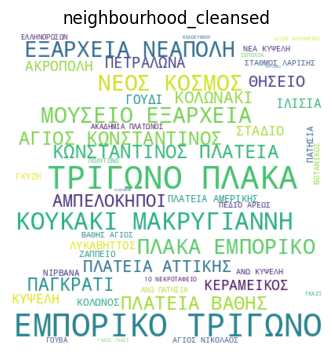

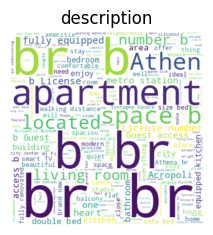

In [225]:
from wordcloud import WordCloud
# Data
data = pd.read_csv('/content/train_2023.csv')
cols = ['neighbourhood_cleansed','description']
wordcloud = [0, 0, 0]
# Create a figure with two subplots arranged horizontally
plt.figure(figsize=(10, 10))
for i,col in enumerate(cols):
  text = data[col].astype(str).str.cat(sep=' ')
  # Create a WordCloud object
  wordcloud[i] = WordCloud(width=400, height=400, background_color='white').generate(text)
  # Plot value counts of 'Categor' column from df1
  plt.subplot(1, 3, (i+1))
  plt.imshow(wordcloud[i], interpolation='bilinear')
  plt.title(col)
  plt.axis('off')
  # Adjust layout to prevent overlapping
  plt.tight_layout()

  # Show the plots
  plt.show()



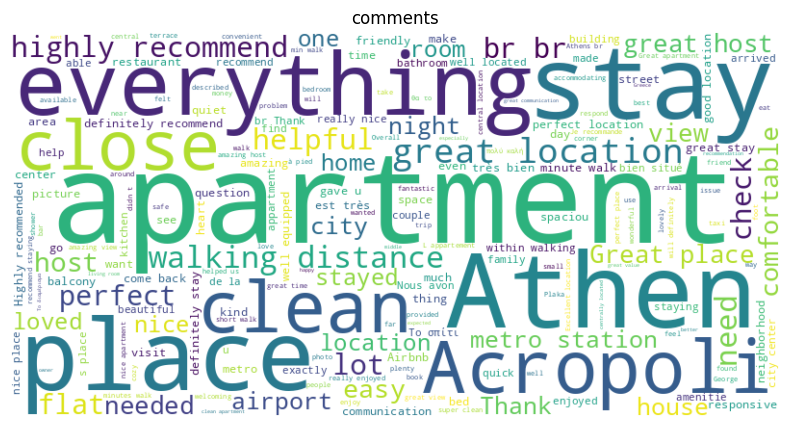

In [226]:
from wordcloud import WordCloud
path_2019_june = '/content/gdrive/MyDrive/data/2023/june/reviews.csv'
path_2019_mar = '/content/gdrive/MyDrive/data/2023/march/reviews.csv'  # Corrected the file name
path_2019_sep = '/content/gdrive/MyDrive/data/2023/september/reviews.csv'
csv_files = [path_2019_june,path_2019_mar,path_2019_sep]

combined_data = pd.DataFrame()
selected_columns = ['comments']

for file in csv_files:
  # Read the CSV file into a DataFrame
  df = pd.read_csv(file)
  # Filter the DataFrame to include only selected columns that exist in both DataFrame and selected_columns
  # Concatenate the DataFrame to the combined_data DataFrame
  combined_data = pd.concat([combined_data, df], ignore_index=True)
  combined_data = combined_data[[col for col in selected_columns if col in df.columns]]
#Sample 50% of the original data, file is too large
combined_data = combined_data.sample(frac=0.5, random_state=42)
# Write the combined data to a new CSV file
combined_data.to_csv('comments.csv', index=False)
# Data
data = pd.read_csv('/content/comments.csv')
def date_to_text(date):
    return str(date)

if data['comments'].str.strip().empty:
    print(f"The column {'comments'} is empty.")
else:
    data['comments'] = data['comments'].fillna('')
    data['comments'] = data['comments'].apply(date_to_text)
    text = data['comments'].str.cat(sep=' ')
    #print(f"Text for column '{col}': {text}")
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('comments')
    plt.axis('off')
    plt.show()



# 1.11

Do this only for 2019 as 2023 has 2000 discreet values

In [227]:
import re
from collections import defaultdict
#Word Sets Created by applying amenities_processing and then painstakingly splitting the resultig dictionary into groups
kitchen = ["toaster","microwave","stove","oven","cooker","freezer","refrigerator","blender","electric kettle","coffee maker",
"rice cooker","induction stove","electric grill","electric smoker", "bbq", "baking","dinnerware","utensils", "silverware"]

bathroom = [ "bathtub", "shower", "sink", "bidet","towels"]

temperature_control = ["fireplace","heater","ac","fan","electric fireplace","electric heater"]

beds = ["blankets", "sheets", "pillows"]

electronic_appliances = ["wifi","tv","washing machine","dryer"
,"iron","speaker","soundbar","vacuum cleaner","hair dryer", "dishwasher"]

storage_space = ["hangers","hampers", "wardrobe", "rack", "closet", "luggage","clothes",]

brands = ["loreal", "elco", "nespresso", "hulu", "janussi", "finlux", "snaige", "neff", "krk", "meraki", "frigidaire", "sonos", "xbox", "samsung",
"panasonic", "sony", "ikea", "marshall", "aeg", "netflix", "amazon", "bosch", "nintendo", "lg", "philips"]

household_items = ["driveway", "pack", "linens", "books", "mats", "hammock", "chair", "table", "patio", "press", "spice"]

personal_care_products = ["gel", "shampoo", "soap", "conditioner", "cream", "oil", "musk", "aloe", "gel shampoo", "hair", "skin",
"body", "face", "toothpaste", "shaving cream", "moisturizer", "sunscreen"]

activities_and_recreation = ["ski", "golf", "games", "yoga", "beach", "spa", "hammam", "hammock", "park", "gym", "fishing",
"boating", "hiking", "cycling", "surfing", "swimming", "exercise", "piano", "video game", "board game", "basketball", "soccer",
"tennis", "pool", "waterfront", "bike"]

miscellaneous = ["valley", "frost", "retro", "seasonally", "from", "upon", "other", "most", "all", "any", "various", "different", "only",
"extra", "shared", "personal", "specific", "public", "available", "nearby", "portable", "custom", "dedicated", "fenced", "open",
"private", "residential", "room", "with", "without", "near", "upon", "during", "in", "on", "off", "all-in-one", "standalone", "curtains", "gas",
"trash"]

#Our dictionary resulting from the amenities column after cleaning
word_set = set()
#Set of sentences from amenities column before splitting into words
entries_set = set()
df = pd.read_csv('/content/train_2023.csv')
def process_amenities(text):
  elements = [elem.strip('"') for elem in text.split('"')]
  new_elements = []
  for elem in elements:
    words = elem.split()
    words = [re.sub(r'\b[^\\ ]*\\[^\\ ]*\b', '', w) for w in words]
    new_elem = ' '.join(words)
    new_elements.append(new_elem)
  elements = new_elements
  elements = [re.sub("([^a-zA-Z\s])", "", e) for e in elements]
  elements = [re.sub("(\s){2,}", " ", e) for e in elements]
  elements = [re.sub(r'\b\w{1}\b', '',e) for e in elements]
  elements = [elem.lower() for elem in elements]
  global entries_set
  entries_set.update(elements)
  filtered_words = [word for word in elements if word.strip()]
  return filtered_words

def process_amenities_stage_two(text):
  new_text = set()
  for word in text:
    if word in kitchen:
      new_text.add("kitchen")
    elif word in bathroom:
      new_text.add("bathroom")
    elif word in temperature_control:
      new_text.add("temperature_control")
    elif word in beds:
      new_text.add("beds")
    elif word in electronic_appliances:
      new_text.add("electronic_appliances")
    elif word in storage_space:
      new_text.add("storage_space")
    elif word in household_items:
      new_text.add("household_items")
    elif word in personal_care_products:
      new_text.add("personal_care_products")
    elif word in activities_and_recreation:
      new_text.add("activities_and_recreation")
    elif word in brands:
      continue
    elif word in miscellaneous:
      continue
    else:
      continue
  return list(new_text)






In [231]:
data = pd.read_csv('/content/train_2019.csv')
data['amenities'] = data['amenities'].apply(process_amenities)
print(len(entries_set))
print(entries_set)
corpus = list(entries_set)
word_frequency = defaultdict(int)
for sentence in corpus:
    words = re.findall(r'\w+', sentence.lower())  # Tokenize the sentence into words
    for word in words:
        word_frequency[word] += 1  # Increment the frequency count for each word

# Sort the dictionary by values (word frequencies) in descending order
#sorted_word_frequency = sorted(word_frequency.items(), key=lambda x: x[1], reverse=True)

# Print the most frequent words in order of frequency
#for word, frequency in sorted_word_frequency:
#    print(f"{word}: {frequency}")


word_set = set(word_frequency.keys())

with open('2023_words.txt', 'w') as file:
    for item in word_set:
        file.write(item + '\n')
#Perfection
data['amenities'] = data['amenities'].apply(process_amenities_stage_two)

1310
{'', 'siemens stainless steel electric stove', 'exercise equipment free weights treadmill', 'hdtv with chromecast dvd player', 'tvkitchen', 'induction stove', 'pets live on this property', 'breakfastelevatorheatingwasheressentialsshampoohangers', 'hdtv with amazon prime video apple tv chromecast netflix', 'whirlpool stainless steel single oven', 'ocean view', 'elevatorheating', 'bosch stainless steel stove', 'garnier shampoo', 'familykid friendly', 'private gym in building', 'corres body soap', 'pantene prov shampoo', 'free washer', 'boss refrigerator', 'free driveway parking on premises  space', 'coffee maker french press', 'private outdoor pool available all year open hours heated', ' conditioner', 'wifikitchenheatingwasher', 'greek products shampoo', ' books and toys for ages years old and years old', 'kitchenelevatorheating', 'free residential garage on premises  space', 'portable radio sound system with bluetooth and aux', 'pantene prov conditioner', 'elea se shampoo', 'hdtv 

Histogram time!

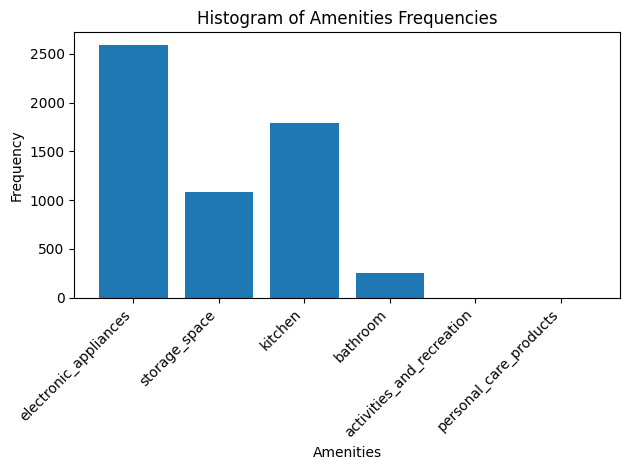

In [232]:
word_frequency = defaultdict(int)
def count_amenities(text):
  global word_frequency
  for word in text:
        word_frequency[word] += 1
z=0
for i, j in data.iterrows():
  count_amenities(data['amenities'][z])
  z=z+1
words = list(word_frequency.keys())
numbers = list(word_frequency.values())
plt.bar(words, numbers)
plt.xlabel('Amenities')
plt.ylabel('Frequency')
plt.title('Histogram of Amenities Frequencies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


1.12

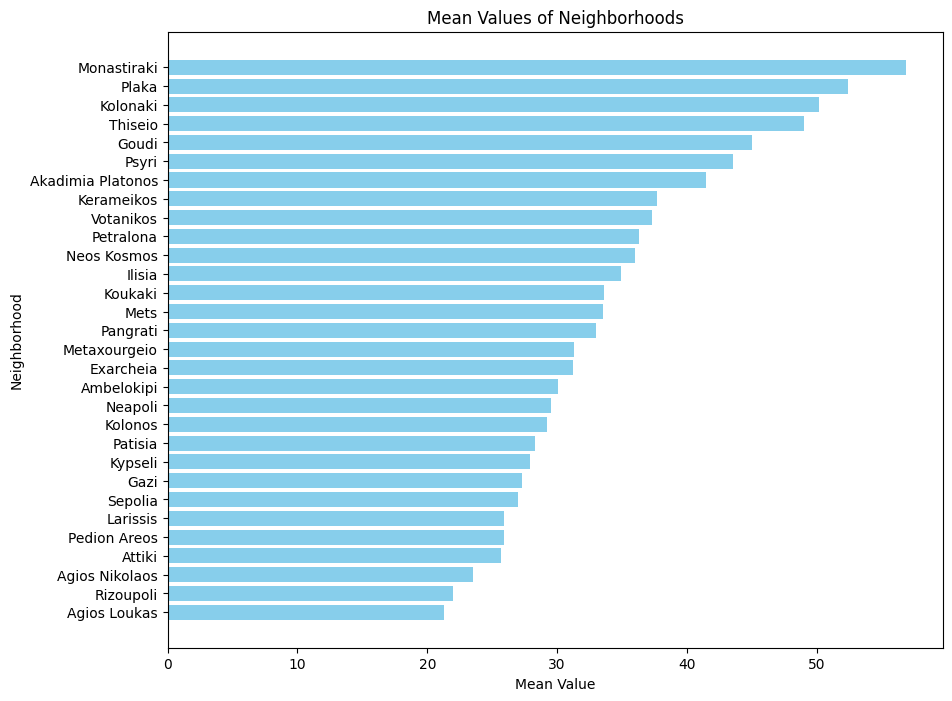

In [233]:
data = pd.read_csv('/content/train_2019.csv')
neighborhoods_with_2_accommodates = data[data['accommodates'] == 2].groupby('neighbourhood')
mean_neighborhoods = neighborhoods_with_2_accommodates['price'].mean().sort_values(ascending=False)
#print(mean_neighorhoods)

# Plot
plt.figure(figsize=(10, 8))
plt.barh(mean_neighborhoods.index, mean_neighborhoods.values, color='skyblue')
plt.xlabel('Mean Value')
plt.ylabel('Neighborhood')
plt.title('Mean Values of Neighborhoods')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top
plt.show()

In [234]:
q1 = mean_neighborhoods.quantile(0.25)
q3 = mean_neighborhoods.quantile(0.75)

# Split into three groups based on quartiles
highest_values = mean_neighborhoods[mean_neighborhoods > q3]
medium_values = mean_neighborhoods[(mean_neighborhoods <= q3) & (mean_neighborhoods >= q1)]
lowest_values = mean_neighborhoods[mean_neighborhoods < q1]
print("The most expensive neighneighborhoods:\n", highest_values)
print("\n")
print("The medium cost neighneighborhoods :\n" , medium_values)
print("\n")
print("The lowest cost neigneighborhoods:\n",lowest_values)

The most expensive neighneighborhoods:
 neighbourhood
Monastiraki          56.857143
Plaka                52.386364
Kolonaki             50.196721
Thiseio              49.000000
Goudi                45.000000
Psyri                43.545455
Akadimia Platonos    41.500000
Kerameikos           37.714286
Name: price, dtype: float64


The medium cost neighneighborhoods :
 neighbourhood
Votanikos       37.333333
Petralona       36.277778
Neos Kosmos     36.035714
Ilisia          34.923077
Koukaki         33.584906
Mets            33.571429
Pangrati        32.974359
Metaxourgeio    31.320000
Exarcheia       31.203704
Ambelokipi      30.067797
Neapoli         29.529412
Kolonos         29.238095
Patisia         28.277778
Kypseli         27.906250
Name: price, dtype: float64


The lowest cost neigneighborhoods:
 neighbourhood
Gazi              27.333333
Sepolia           27.000000
Larissis          25.897959
Pedion Areos      25.884615
Attiki            25.700000
Agios Nikolaos    23.545455
Rizo

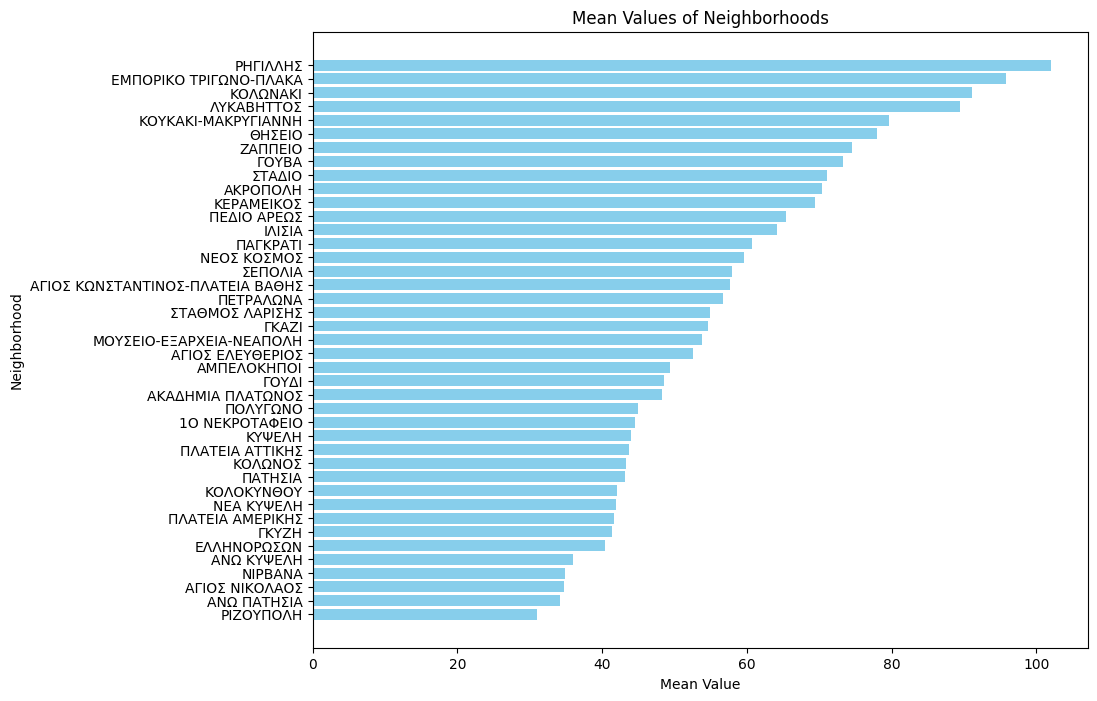

In [235]:
data = pd.read_csv('/content/train_2023.csv')
neighborhoods_with_2_accommodates = data[data['accommodates'] == 2].groupby('neighbourhood_cleansed')
mean_neighborhoods = neighborhoods_with_2_accommodates['price'].mean().sort_values(ascending=False)
#print(mean_neighorhoods)

# Plot
plt.figure(figsize=(10, 8))
plt.barh(mean_neighborhoods.index, mean_neighborhoods.values, color='skyblue')
plt.xlabel('Mean Value')
plt.ylabel('Neighborhood')
plt.title('Mean Values of Neighborhoods')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top
plt.show()

In [236]:
q1 = mean_neighborhoods.quantile(0.25)
q3 = mean_neighborhoods.quantile(0.75)

# Split into three groups based on quartiles
highest_values = mean_neighborhoods[mean_neighborhoods > q3]
medium_values = mean_neighborhoods[(mean_neighborhoods <= q3) & (mean_neighborhoods >= q1)]
lowest_values = mean_neighborhoods[mean_neighborhoods < q1]
print("The most expensive neighneighborhoods:\n", highest_values)
print("\n")
print("The medium cost neighneighborhoods :\n" , medium_values)
print("\n")
print("The lowest cost neigneighborhoods:\n",lowest_values)

The most expensive neighneighborhoods:
 neighbourhood_cleansed
ΡΗΓΙΛΛΗΣ                  102.000000
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ     95.786047
ΚΟΛΩΝΑΚΙ                   91.086957
ΛΥΚΑΒΗΤΤΟΣ                 89.500000
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ        79.704918
ΘΗΣΕΙΟ                     78.000000
ΖΑΠΠΕΙΟ                    74.500000
ΓΟΥΒΑ                      73.250000
ΣΤΑΔΙΟ                     71.125000
ΑΚΡΟΠΟΛΗ                   70.363636
Name: price, dtype: float64


The medium cost neighneighborhoods :
 neighbourhood_cleansed
ΚΕΡΑΜΕΙΚΟΣ                          69.366667
ΠΕΔΙΟ ΑΡΕΩΣ                         65.400000
ΙΛΙΣΙΑ                              64.142857
ΠΑΓΚΡΑΤΙ                            60.750000
ΝΕΟΣ ΚΟΣΜΟΣ                         59.552632
ΣΕΠΟΛΙΑ                             58.000000
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ    57.631579
ΠΕΤΡΑΛΩΝΑ                           56.648649
ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ                     54.875000
ΓΚΑΖΙ                               54.666667
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ

# 1.13

neighbourhoods with max rating

In [237]:
data = pd.read_csv('/content/train_2019.csv')
selected_columns = data.groupby('neighbourhood')['review_scores_rating'].mean()
selected_columns = selected_columns.sort_values(ascending=False)
print(selected_columns.head(10))

neighbourhood
Rouf            100.000000
Sepolia          97.960427
Votanikos        96.991154
Agios Loukas     96.988205
Mets             96.751086
Kolonos          96.745931
Kerameikos       96.716672
Rizoupoli        96.690641
Thiseio          96.512503
Pangrati         96.472144
Name: review_scores_rating, dtype: float64


In [238]:
data = pd.read_csv('/content/train_2023.csv')
selected_columns = data.groupby('neighbourhood_cleansed')['review_scores_rating'].mean()
selected_columns = selected_columns.sort_values(ascending=False)
print(selected_columns.head(10))

neighbourhood_cleansed
ΡΙΖΟΥΠΟΛΗ            4.926667
ΖΑΠΠΕΙΟ              4.890728
ΡΗΓΙΛΛΗΣ             4.890000
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ    4.873086
ΝΕΑ ΚΥΨΕΛΗ           4.867742
ΒΟΤΑΝΙΚΟΣ            4.864737
1Ο ΝΕΚΡΟΤΑΦΕΙΟ       4.864167
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ       4.863684
ΠΟΛΥΓΩΝΟ             4.856357
ΓΚΥΖΗ                4.849122
Name: review_scores_rating, dtype: float64


top 10 most expensive neighbourhoods

In [239]:
data = pd.read_csv('/content/train_2019.csv')
selected_columns = data.groupby('neighbourhood')['price'].mean()
selected_columns = selected_columns.sort_values(ascending=False)
print(selected_columns.head(10))

neighbourhood
Plaka          61.112840
Monastiraki    60.727273
Kolonaki       57.621469
Psyri          56.382609
Thiseio        55.500000
Kerameikos     51.333333
Votanikos      51.083333
Rouf           50.000000
Neos Kosmos    48.399123
Koukaki        46.850679
Name: price, dtype: float64


In [240]:
data = pd.read_csv('/content/train_2023.csv')
selected_columns = data.groupby('neighbourhood_cleansed')['price'].mean()
selected_columns = selected_columns.sort_values(ascending=False)
print(selected_columns.head(10))

neighbourhood_cleansed
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ    108.121575
ΑΚΡΟΠΟΛΗ                  107.182927
ΖΑΠΠΕΙΟ                   106.032258
ΚΟΛΩΝΑΚΙ                  105.472222
ΘΗΣΕΙΟ                     99.239583
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ        97.180272
ΡΗΓΙΛΛΗΣ                   94.333333
ΛΥΚΑΒΗΤΤΟΣ                 90.093023
ΒΟΤΑΝΙΚΟΣ                  89.157895
ΚΕΡΑΜΕΙΚΟΣ                 88.390244
Name: price, dtype: float64


top 10 neighbourhoods with most bedrooms per house (biggest houses)

In [241]:
data = pd.read_csv('/content/train_2019.csv')
selected_columns = data.groupby('neighbourhood')['bedrooms'].mean()
selected_columns = selected_columns.sort_values(ascending=False)
print(selected_columns.head(10))

neighbourhood
Rouf            2.000000
Votanikos       1.458333
Thiseio         1.452381
Rizoupoli       1.375000
Kerameikos      1.343137
Pangrati        1.312849
Pedion Areos    1.308824
Attiki          1.308511
Neapoli         1.292308
Larissis        1.290123
Name: bedrooms, dtype: float64


In [242]:
data = pd.read_csv('/content/train_2023.csv')
selected_columns = data.groupby('neighbourhood_cleansed')['bedrooms'].mean()
selected_columns = selected_columns.sort_values(ascending=False)
print(selected_columns.head(10))

neighbourhood_cleansed
ΠΡΟΜΠΟΝΑ          2.000000
ΠΕΔΙΟ ΑΡΕΩΣ       1.777778
ΓΟΥΒΑ             1.733333
ΡΙΖΟΥΠΟΛΗ         1.666667
ΡΗΓΙΛΛΗΣ          1.666667
ΒΟΤΑΝΙΚΟΣ         1.578947
ΓΚΥΖΗ             1.518519
ΘΗΣΕΙΟ            1.489583
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ    1.473684
ΠΑΓΚΡΑΤΙ          1.473684
Name: bedrooms, dtype: float64


#1.14

In [243]:
data = pd.read_csv('/content/train_2023.csv')


selected_columns = data.groupby('host_id')['id'].nunique()
selected_columns = selected_columns.sort_values(ascending=False)



print(selected_columns.head(10))


host_id
153592692    22
180896799    22
251730165    22
259969589    21
194627760    20
65714690     19
1167063      18
23444614     18
149346682    18
84041447     17
Name: id, dtype: int64


In [244]:
data = pd.read_csv('/content/train_2019.csv')


selected_columns = data.groupby('host_id')['id'].nunique()
selected_columns = selected_columns.sort_values(ascending=False)



print(selected_columns.head(10))

host_id
94312648     18
92310506     10
54443805     10
189736540     9
173384199     9
10581143      9
184563460     9
39330428      9
90390850      8
7032540       8
Name: id, dtype: int64


#1.15

#Observations for our data

> Add blockquote



We observed that in 2023 there are more neighbourhoods in our data base than in 2019. The number of listings per neighbourhood also increased.

Regarding the most expensive neighbourhoods per year we observed that Monastiraki is no longer one of the top 10 most expensive neighbourhoods. Overall, the most expensive neighbourhoods are situated in the center of Athens as expected and traditionally expensive neighbourhoods remain expensive (Plaka, Kolonaki).


What was interesting is the notable increase (40%-50%) in the avarege price of accomodation in those areas between 2019 and 2023. For example, the mean price per night for the most expensive neighbourhood was 56.857143 in 2019 while in 2023  it was 102.000000


# PART B: Recommendations System

In [245]:
import nltk
from nltk.corpus import stopwords
from nltk import BigramCollocationFinder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
import pickle
import re

# Preprocessing of text

In [246]:
#Remove Stop Words Function
def rem_stopwords(text):
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

# Choose between 2019 and 2023

In [247]:
data = pd.read_csv('/content/train_2019.csv')


In [248]:
data = pd.read_csv('/content/train_2023.csv')

In [249]:
nltk.download('stopwords')
data['desc&name'] = data['name']+' '+data['description']
print(data['desc&name'].head(10))
data['desc&name'] = data['desc&name'].apply(lambda r: re.sub(r'([^a-zA-Z\s])', '', r))
data['desc&name'] = data['desc&name'].apply(rem_stopwords)
print(data['desc&name'].head(10))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    Rental unit in Athens · ★4.80 · 1 bedroom · 1 ...
1    Rental unit in Athens · ★4.80 · 1 bedroom · 2 ...
2    Rental unit in Athens · ★4.63 · 2 bedrooms · 1...
3    Rental unit in Athens · ★4.69 · 2 bedrooms · 2...
4    Rental unit in Athens · ★4.17 · 1 bedroom · 1 ...
5    Rental unit in Athens · ★4.79 · 2 bedrooms · 2...
6    Condo in Athens · ★4.87 · 1 bedroom · 2 beds ·...
7    Condo in Athens · ★4.63 · 1 bedroom · 2 beds ·...
8    Rental unit in Athens · ★4.71 · 2 bedrooms · 2...
9    Condo in Athens · ★4.78 · 2 bedrooms · 2 beds ...
Name: desc&name, dtype: object
0    Rental unit Athens bedroom bed bath Athens Qua...
1    Rental unit Athens bedroom beds bath AQA bedro...
2    Rental unit Athens bedrooms bed bath nice comf...
3    Rental unit Athens bedrooms beds bath Apartmen...
4    Rental unit Athens bedroom bed bath listing id...
5    Rental unit Athens bedrooms beds bath st floor...
6    Condo Athens bedroom beds bath bThe spacebbr D...
7    Condo Athens bedroom beds bat

Wordcloud

In [250]:
text = data['desc&name'].astype(str).str.cat(sep=' ')
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
words = wordcloud.words_

# Rank words based on frequency
ranked_words = sorted(words.items(), key=lambda x: x[1], reverse=True)

# Select top words
top_descriptive_words = [word[0] for word in ranked_words[:10]]

print("Top descriptive words:", top_descriptive_words)


Top descriptive words: ['Athina bedroom', 'bThe spacebbr', 'br bThe', 'bedroom bed', 'Rental unit', 'beds bath', 'unit Athina', 'br br', 'fully equipped', 'bLicense numberbbr']


Stemming

In [251]:
stemmer = PorterStemmer()
def stemming(text):
  tokens = text.split()
  ret = []
  for token in tokens:
    ret.append(stemmer.stem(token))
  return ' '.join(ret)

data['desc&name'] = data['desc&name'].apply(stemming)

Some more cleaning

In [252]:
data = data[data['desc&name'].notna()]
data = data.reset_index(drop=True)
data = data.drop_duplicates(subset='id')

Creating TF-IDF Vectorizer

In [253]:
vectorizer = TfidfVectorizer(ngram_range=(1, 1),max_df=1.0, min_df=1, norm='l1', stop_words='english')
tfidf_unigrams = vectorizer.fit_transform(data['desc&name'])


vectorizer = TfidfVectorizer(ngram_range=(2, 2),max_df=1.0, min_df=1, norm='l1',stop_words='english')
tfidf_bigrams = vectorizer.fit_transform(data['desc&name'])

# Recommendations for unigrams

In [254]:
recommendations = {}
cosine_similarities = cosine_similarity(tfidf_unigrams, tfidf_unigrams)
for i in range(0, len(data)):
  recommendations[data['id'].iloc[i]] = cosine_similarities[i].argsort()[:-11:-1]

In [255]:

with open('recommendations.pickle', 'wb') as handle:
  pickle.dump(recommendations, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('recommendations.pickle', 'rb') as handle:
  recommendations = pickle.load(handle)


In [256]:
def recommend(item_id, num):
	print('Recommnending ' + str(num) + ' listings similar to ' + str(item_id))
	print('---------------------------------------------------------')
	index = data[data['id'] == item_id].index[0]
	recs = recommendations[item_id][1:num+1]
	#print(recs)

	for rec in recs:
		print('Recommended: ' + str(data['id'].iloc[rec]))
		print('Description: ' + str(data['desc&name'].iloc[rec]))
		print('(score: ' + str(cosine_similarity(tfidf_unigrams[index], tfidf_unigrams[rec])) + ')')
		print()
#recommend(item_id = 13041527, num = 5)
recommend(item_id = 10990, num = 5)

Recommnending 5 listings similar to 10990
---------------------------------------------------------
Recommended: 10995
Description: rental unit athen bedroom bed bath aqa bedroom apart nd floorbr excel locat br close metro station br love br clean br facil need nice balconi excel wifi smarttv fulli air condit wifi fiber connect mbp fulli equip kitchen morebr br bthe spacebbr aqa excel locat close metro love clean bedroom apart squar meter nd floor elev facil need nice balconi face inner garden enjoy breakfast morn relax even separ fulli equip kitchen everyth need prepar lunchdinn nice live room relax enjoy movi sport event clean nice bathroom case peopl sofab live roombr studio everyth needbr telephon line incom call call
(score: [[0.7556455]])

Recommended: 27570647
Description: stylish apt athen center stylish stfloor renov apart heart athen place ideal coupl friend famili want explor citi sinc minut walk panepistimio metro stationbr br bthe spacebbr apart consist big live room sofa 

# Recommendations for Bigrams

In [257]:
recommendations = {}
cosine_similarities = cosine_similarity(tfidf_bigrams, tfidf_bigrams)
for i in range(0, len(data)):
  recommendations[data['id'].iloc[i]] = cosine_similarities[i].argsort()[:-11:-1]

In [258]:
with open('recommendations_2.pickle', 'wb') as handle:
  pickle.dump(recommendations, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('recommendations_2.pickle', 'rb') as handle:
  recommendations = pickle.load(handle)

In [259]:
def recommend(item_id, num):
	print('Recommnending ' + str(num) + ' listings similar to ' + str(item_id))
	print('---------------------------------------------------------')
	index = data[data['id'] == item_id].index[0]
	recs = recommendations[item_id][1:num+1]
	#print(recs)

	for rec in recs:
		print('Recommended: ' + str(data['id'].iloc[rec]))
		print('Description: ' + str(data['desc&name'].iloc[rec]))
		print('(score: ' + str(cosine_similarity(tfidf_bigrams[index], tfidf_bigrams[rec])) + ')')
		print()
#recommend(item_id = 13041527, num = 5)
recommend(item_id = 10990, num = 5)

Recommnending 5 listings similar to 10990
---------------------------------------------------------
Recommended: 10995
Description: rental unit athen bedroom bed bath aqa bedroom apart nd floorbr excel locat br close metro station br love br clean br facil need nice balconi excel wifi smarttv fulli air condit wifi fiber connect mbp fulli equip kitchen morebr br bthe spacebbr aqa excel locat close metro love clean bedroom apart squar meter nd floor elev facil need nice balconi face inner garden enjoy breakfast morn relax even separ fulli equip kitchen everyth need prepar lunchdinn nice live room relax enjoy movi sport event clean nice bathroom case peopl sofab live roombr studio everyth needbr telephon line incom call call
(score: [[0.65483361]])

Recommended: 8628217
Description: rental unit athina bedroom bed bath furnish apart modern fulli equip renov close mean public transport centr athensbr excel locat br close metro station br love br cleanbr br bthe spacebbr telephon line incom 

# Bigram Collocation Finder

In [260]:
nltk.download('punkt')
tokenized_texts = [word_tokenize(text) for text in data['desc&name']]
# Convert the tokenized texts into a single list
tokens = [token for sublist in tokenized_texts for token in sublist]

bigrams = nltk.bigrams(tokens)

# Initialize a BigramCollocationFinder
finder = BigramCollocationFinder.from_words(tokens)

# Score the bigrams by frequency
bigram_scores = finder.score_ngrams(nltk.collocations.BigramAssocMeasures().raw_freq)

# Get the top 10 most frequent bigrams
top_10_bigrams = bigram_scores[:10]

# Print the top 10 most frequent bigrams
print("Top 10 most frequent bigrams:")
for bigram, score in top_10_bigrams:
    print(bigram, "-", score)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 10 most frequent bigrams:
('bedroom', 'bed') - 0.012176116143979865
('bed', 'bath') - 0.011780246522597905
('athina', 'bedroom') - 0.010184266891131687
('bthe', 'spacebbr') - 0.010075923626332414
('br', 'bthe') - 0.010000916750702148
('rental', 'unit') - 0.007942394719515956
('unit', 'athina') - 0.007158989574044287
('br', 'br') - 0.006713115368908816
('fulli', 'equip') - 0.005054630007750711
('blicens', 'numberbbr') - 0.004808774137629283
